In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv("C:\\Users\\SSVD HEMANTH\\Documents\\hemanth\\ml\\car data.csv")

df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [17]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

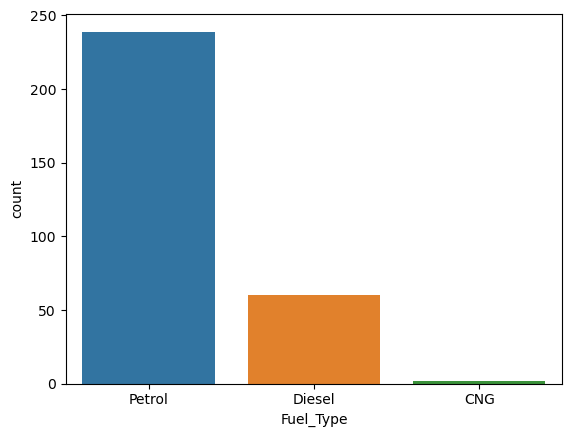

In [19]:
sns.countplot(x='Fuel_Type',data=df)
plt.show()

In [20]:
df['Selling_type'].value_counts()

Dealer        195
Individual    106
Name: Selling_type, dtype: int64

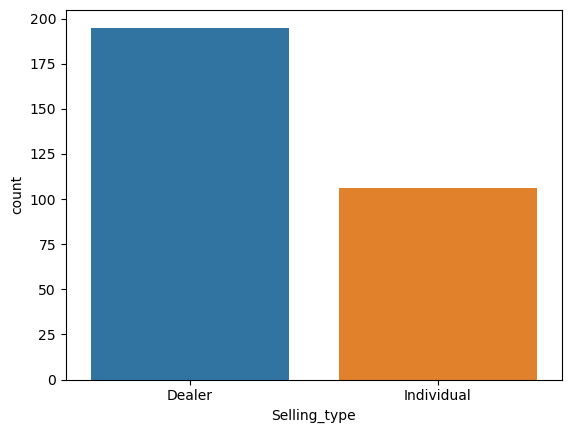

In [21]:
sns.countplot(x='Selling_type', data=df)
plt.show()

In [22]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

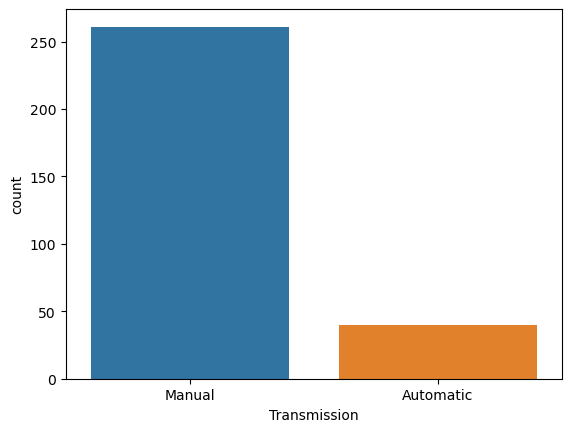

In [23]:
sns.countplot(x='Transmission', data=df)
plt.show()

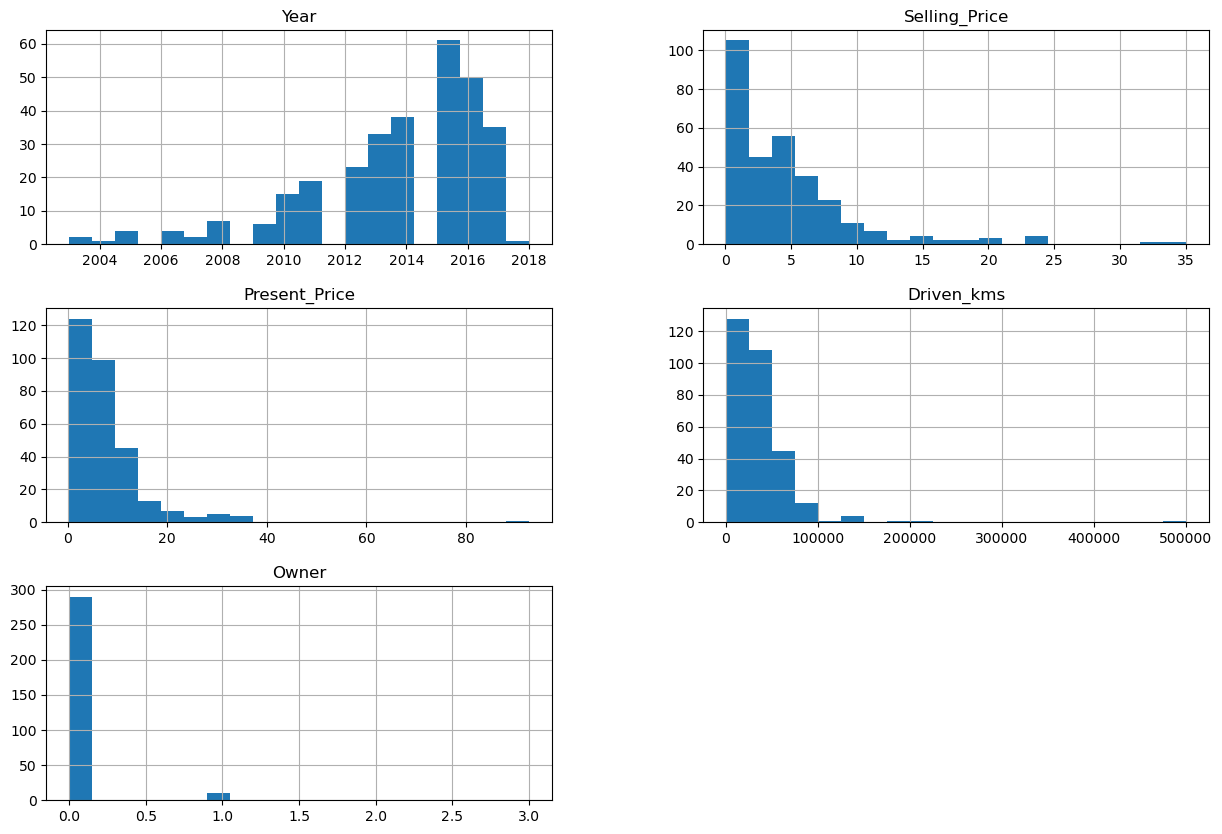

In [24]:
df.hist(bins=20,figsize=(15,10))
plt.show()

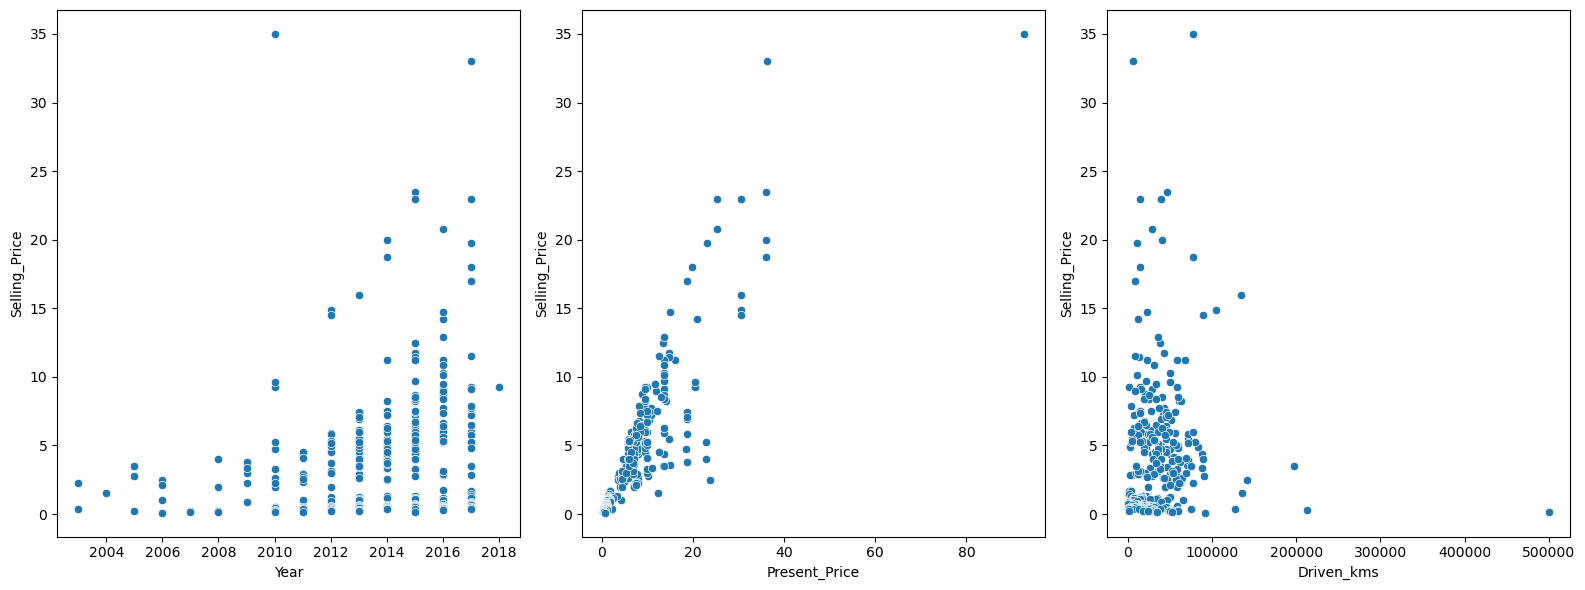

In [30]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Year', y='Selling_Price', data=df)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=df)
plt.tight_layout()
plt.show()

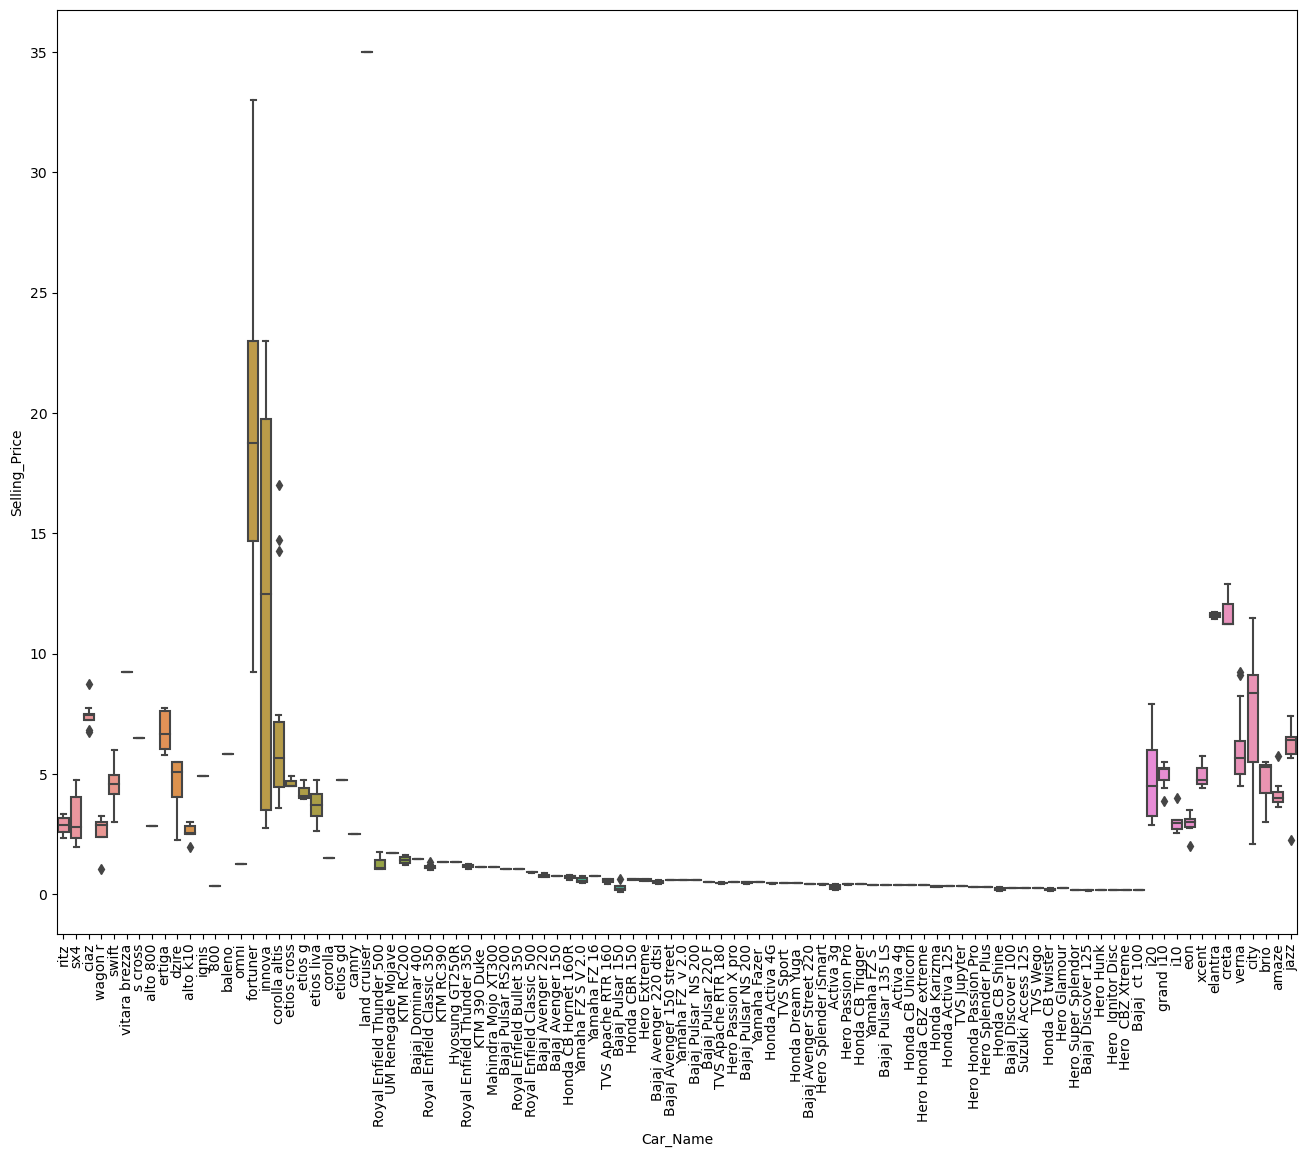

In [36]:
plt.figure(figsize=(16,12))
sns.boxplot(x='Car_Name',y='Selling_Price',data=df)
plt.xticks(rotation=90)
plt.show()

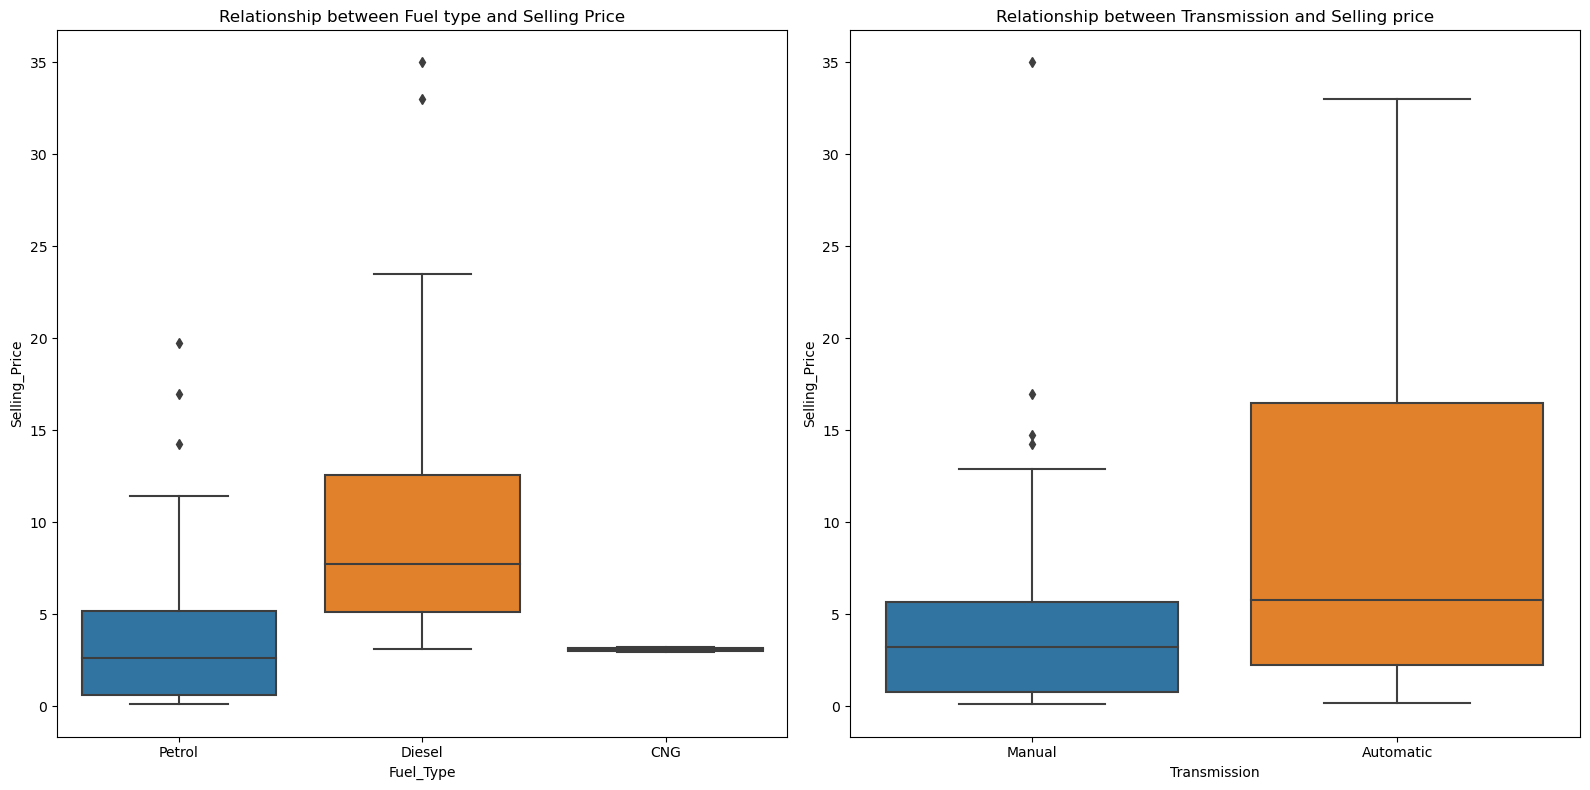

In [37]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Relationship between Fuel type and Selling Price')
plt.subplot(1, 2, 2)
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Relationship between Transmission and Selling price')
plt.tight_layout()
plt.show()

In [38]:
x=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [40]:
X_encoded = pd.get_dummies(x, columns=['Fuel_Type', 'Selling_type', 'Transmission','Car_Name'], prefix=['Fuel', 'Selling', 'Transmission','Cars'])

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_pred=linear_model.predict(X_test)


In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_linear=mean_squared_error(y_test,y_pred)
rmse_linear=sqrt(mse_linear)
print(f'Linear Regression Rmse: {rmse_linear}')

Linear Regression Rmse: 1.5125556296297602


In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [47]:
y_pred_rf = rf_model.predict(X_test)

In [48]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'Random Forest RMSE: {rmse_rf}')

Random Forest RMSE: 0.8724393833985933


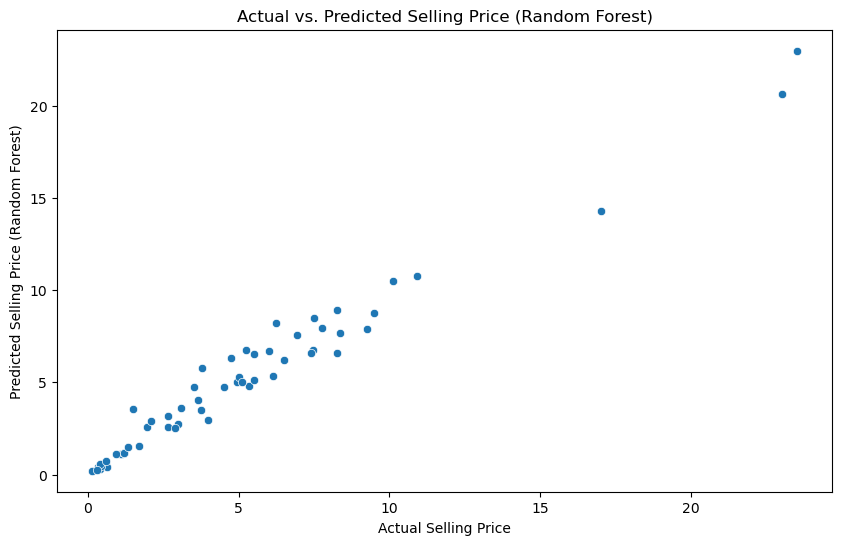

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Random Forest)')
plt.title('Actual vs. Predicted Selling Price (Random Forest)')
plt.show()